In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.odr.odrpack as odr

In [7]:
x = np.arange(0,10,0.1)
m = 0.5
c = 1.0
y = m * x + c
xerr = np.ones(len(x))
yerr = np.ones(len(x))
xobs = np.random.randn(len(x)) * xerr + x
yobs = np.random.randn(len(x)) * yerr + y

<ErrorbarContainer object of 3 artists>

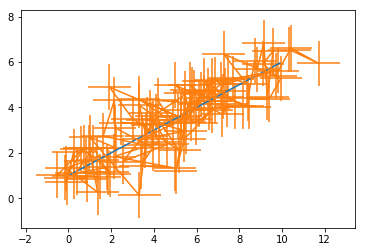

In [10]:
fig, ax = plt.subplots()
ax.errorbar(x, y)
ax.errorbar(xobs, yobs, xerr=xerr, yerr=yerr )

In [13]:
def func(p, x):
    return p[0] * x + p[1]

linear = odr.Model(func)
mydata = odr.RealData(xobs, yobs, sx=xerr, sy=yerr)
myodr = odr.ODR(mydata, linear, beta0=[0.3, 0.8])
myoutput = myodr.run()
myoutput.pprint()

Beta: [0.48965445 1.09576428]
Beta Std Error: [0.03165465 0.18151964]
Beta Covariance: [[ 0.00142771 -0.00702332]
 [-0.00702332  0.04694742]]
Residual Variance: 0.7018357269830454
Inverse Condition #: 0.08352164135947739
Reason(s) for Halting:
  Sum of squares convergence


In [25]:
means = np.array(myoutput.beta)
cov = np.array(myoutput.cov_beta)
np.diag(cov)**0.5
print(means, cov)

[0.48965445 1.09576428] [[ 0.00142771 -0.00702332]
 [-0.00702332  0.04694742]]


In [39]:
x = np.linspace(0, 10, 1000)
aa, bb = np.random.multivariate_normal(means, cov, size=len(x)).T
tmp = [np.std(bb * i + aa) for i in x]
a = means[0]
b = means[1]
y = a * x + b

<Figure size 432x288 with 0 Axes>

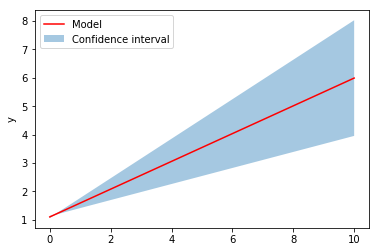

In [46]:
import matplotlib.gridspec as gridspec
fig = plt.figure()
fig, ax = plt.subplots()
#ax.errorbar(x, y, yerr=yerr, fmt='ko', label='Data')
ax.plot(x, a * x + b, 'r-', label='Model')
ax.fill_between(x, a * x + b - tmp, a * x + b + tmp, alpha=0.4,
                label='Confidence interval')
ax.set_ylabel('y')
ax.legend(loc=2)